<a href="https://colab.research.google.com/github/ds777/wooldridge/blob/master/01_introduction_to_econometrics_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to econometrics with Python

In [0]:
## Install libraries

In [28]:
!pip install -q wooldridge

     |████████████████████████████████| 5.1MB 3.3MB/s 


In [52]:
## Import (load) libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import wooldridge as woo


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Creating graphs

### Basic graphs

In [0]:
# create data:
x = [1, 3, 4, 7, 8, 9]
y = [0, 3, 6, 9, 7, 8]


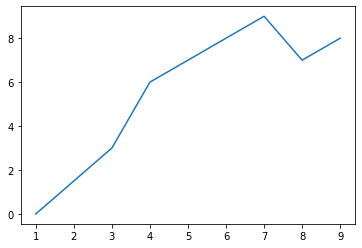

In [3]:
# plot
plt.plot(x, y)


In [0]:
# plot, save, and close
plt.figure(figsize=(6, 4))
plt.plot(x, y, color='black', linestyle='--', linewidth=3)
plt.savefig('Graphs-Basics-a.pdf')
plt.savefig('Graphs-Basics-b.png')
plt.close()

### Graphs of functions

In [0]:
# Define domain of function and calculate quadratic function
# (creates an array with 100 equispaced elements from -3 to 2):
x1 = np.linspace(-3, 2, num=100)
# function values for all these values:
y1 = x1 ** 2

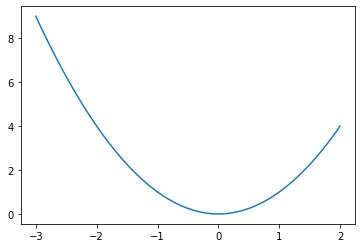

In [17]:
# Plot quadratic function:
plt.plot(x1, y1)
plt.savefig('Graphs-Functions-a.pdf')

In [0]:
# Define domain of function and calculate normal density function:
x2 = np.linspace(-4, 4, num=100)
y2 = stats.norm.pdf(x2)

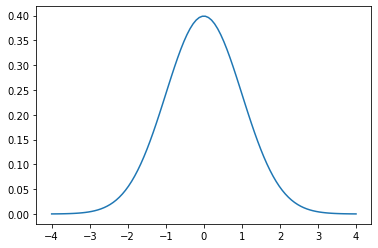

In [20]:
# Plot normal density:
plt.plot(x2, y2)
plt.savefig('Graphs-Functions-b.png')

### Overlay several functions

In [0]:
# define domain for all functions:
x = np.linspace(-4, 4, num=100)
# get different density evaluations:
y1 = stats.norm.pdf(x, 0, 1)
y2 = stats.norm.pdf(x, 1, 0.5)
y3 = stats.norm.pdf(x, 0, 2)

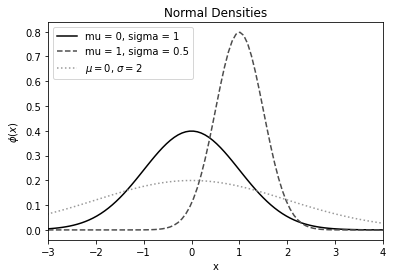

In [25]:
# plot overlay:
plt.plot(x, y1, linestyle='-', color='black', label='mu = 0, sigma = 1')
plt.plot(x, y2, linestyle='--', color='0.3', label='mu = 1, sigma = 0.5')
plt.plot(x, y3, linestyle=':', color='0.6', label='$\mu = 0$, $\sigma = 2$')
plt.xlim(-3, 4)
plt.title('Normal Densities')
plt.ylabel('$\phi(x)$')
plt.xlabel('x')
plt.legend()
plt.savefig('Graphs-BuildingBlocks.png')

## Descriptive statistics

In [41]:
# Load a dataset from the wooldrige library
ceosal1 = woo.dataWoo('ceosal1')
ceosal1

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894
...,...,...,...,...,...,...,...,...,...,...,...,...
204,930,10,1509.099976,9.0,20.500000,131,0,0,0,1,6.835185,7.319269
205,525,3,1097.099976,15.5,20.100000,72,0,0,0,1,6.263398,7.000426
206,658,32,4542.600098,12.1,-7.800000,68,0,0,0,1,6.489205,8.421255
207,555,6,2023.000000,13.7,-14.600000,60,0,0,0,1,6.318968,7.612337


### Central tendency, dispersion, correlation

In [0]:
# extract roe and salary:
roe = ceosal1['roe']
salary = ceosal1['salary']

In [67]:
#  average for roe:
roe_mean = np.mean(roe)
roe_mean

17.18421050521175

In [68]:
#  average for salary:
salary_mean = np.mean(salary)
salary_mean

1281.1196172248804

In [69]:
#  median for salary
salary_med = np.median(salary)
salary_med

1039.0

In [74]:
# standard deviation for salary:
salary_std = np.std(salary)
salary_std

1369.0582486088983

In [77]:
# correlation between salary and ROE:
salary_roe_corr = np.corrcoef(salary, roe)
salary_roe_corr


array([[1.        , 0.11484173],
       [0.11484173, 1.        ]])

### Histogram and kernel density

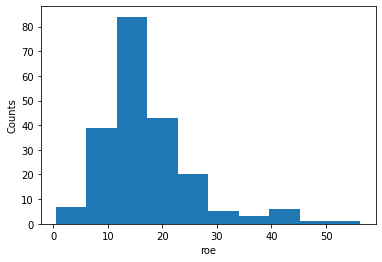

In [47]:
# histogram with counts
plt.hist(roe)
plt.ylabel('Counts')
plt.xlabel('roe')
plt.savefig('Histogram1.png')

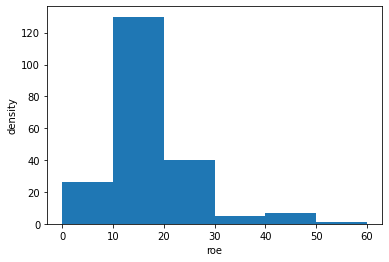

In [51]:
# histogram with explicit breaks:
breaks = [0, 10, 20, 30, 40, 50, 60]
plt.hist(roe, bins=breaks)
plt.ylabel('Counts')
plt.xlabel('roe')
plt.savefig('Histogram2.png')

In [0]:
# estimate kernel density:
kde = sm.nonparametric.KDEUnivariate(roe)
kde.fit()

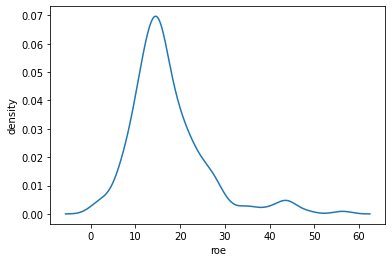

In [57]:
# kernel density:
plt.plot(kde.support, kde.density)
plt.ylabel('density')
plt.xlabel('roe')
plt.savefig('Density1.png')

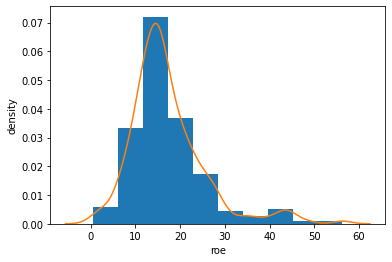

In [61]:
# Kernel density with overlayed histogram:
plt.hist(roe, density=True)
plt.plot(kde.support, kde.density)
plt.ylabel('density')
plt.xlabel('roe')
plt.savefig('Density2.png')

### Boxplot

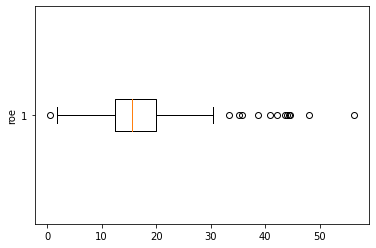

In [79]:
# plot horizontal boxplot
plt.boxplot(roe, vert=False)
plt.ylabel('roe')
plt.savefig('Boxplot1.png')